# Working with data - Basics
by Ahmet Sacan.


In [20]:
#See bmes.ahmet/README.TXT for setting up BMESAHMETDIR environment variable.
import sys,os; sys.path.append(os.environ['BMESAHMETDIR']); import bmes

import pandas as pd
import numpy as np

In [2]:
url='http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data';
file=bmes.downloadurl(url);
print(file)

C:/Users/ahmet/AppData/Local/Temp/bmes/breast-cancer-wisconsin.data


In [11]:
# Well-designed data files would have a header row with column names.
# read_csv() would have normally assumed the first line to be the header row.
# But this file does not. I manually extracted the attribute names
# from: http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.names
# We'll tell read_csv that this file does not have a header row and provide
# the column names ourselves.
attributes=['id','thickness','cellsizeuniform','cellshapeuniform','adhesion','cellsize','barenuclei','blandchromatin','normalnucleoli','mitoses','class'];

t = pd.read_csv(file, header=None, names=attributes);
ttop5=t.head()
ttop5

,id,thickness,cellsizeuniform,cellshapeuniform,adhesion,cellsize,barenuclei,blandchromatin,normalnucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


## Using the Pandas object

In [21]:
t.iloc[2:5,0:4]

,id,thickness,cellsizeuniform,cellshapeuniform
2,1015425,3,1,1
3,1016277,6,8,8
4,1017023,4,1,1


In [7]:
t.iloc[0:5,0:4].values

array([[1000025,       5,       1,       1],
       [1002945,       5,       4,       4],
       [1015425,       3,       1,       1],
       [1016277,       6,       8,       8],
       [1017023,       4,       1,       1]], dtype=int64)

In [23]:
ttop5['thickness']

0    5
1    5
2    3
3    6
4    4
Name: thickness, dtype: int64

In [13]:
ttop5[['thickness','class']]

,thickness,class
0,5,2
1,5,2
2,3,2
3,6,2
4,4,2


## boxplot visualization for groups

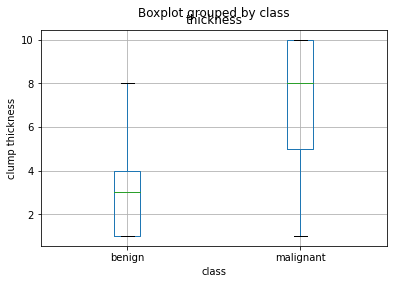

In [25]:
from pylab import *

# we have manually determined that class=2 is benign and class=4 is malignant.
t.boxplot(column='thickness',by='class');
ylabel('clump thickness');
plt.xticks([1, 2], ['benign','malignant']);

## Calculating correlation

In [40]:
correlation=t['thickness'].corr(t['cellsize']);
correlation

0.5218162199598524

## Calculating significance of difference

In [61]:
import scipy.stats
#Is there significant difference in the clump thickness, between benign &
# malignant samples?
Ibenign = t['class']==2
Imalignant  = t['class']==4

result = scipy.stats.ttest_ind(t[Ibenign]['thickness'], t[Imalignant]['thickness'])
print(result)
result.pvalue

Ttest_indResult(statistic=-27.07779493262112, pvalue=6.83556552804087e-111)


6.83556552804087e-111